In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
plt.rcParams['axes.grid'] = False

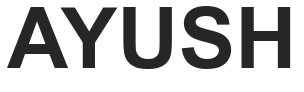

In [2]:
fig, ax = plt.subplots(figsize= (4,1))
ax.text(0.5, 0.5, 'AYUSH', va= 'center', ha= 'center', weight= 'bold', size= 85)
ax.axis('off');
fig.savefig('./aayush.png')
plt.show();
plt.close(fig)

In [3]:
img = plt.imread('./aayush.png')

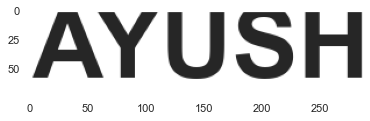

In [4]:
plt.imshow(img)

In [5]:
img.shape

(72, 288, 4)

TypeError: Invalid shape (4, 288, 72) for image data

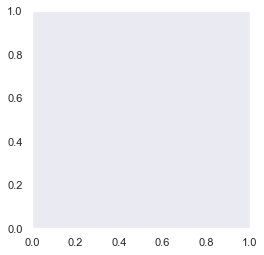

In [16]:
plt.imshow(img.T) #Error

# 

In [20]:
img[::-1, : , 0].shape

(72, 288)

# 

In [53]:
a = np.random.randint(0, 10, (2,3,3))
a

array([[[9, 3, 3],
        [0, 5, 5],
        [7, 1, 7]],

       [[1, 4, 2],
        [1, 1, 4],
        [9, 8, 5]]])

In [34]:
a[::-1, :, 0]

array([[1, 1, 9],
       [9, 0, 7]])

In [35]:
a[::-1, :, 0].T

array([[1, 9],
       [1, 0],
       [9, 7]])

# This will happen with this operation 

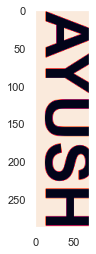

In [52]:
plt.imshow(img[::-1, :, 0].T)

In [6]:
img = img[::-1, :, 0].T

In [7]:
X = np.random.rand(4 * 1000, 2)

In [8]:
i, j = (X * img.shape).astype(int).T

In [9]:
i

array([180,  31, 125, ...,  61,  36, 147])

In [10]:
j

array([ 2, 43, 54, ..., 48, 13, 33])

In [20]:
mask = img[i, j] < 1
mask

array([False, False,  True, ..., False, False, False])

In [21]:
X = X[mask]

In [22]:
X

array([[0.43459413, 0.76051016],
       [0.26821636, 0.83807821],
       [0.01951962, 0.27432289],
       ...,
       [0.48035377, 0.22729278],
       [0.74391724, 0.21317647],
       [0.12317999, 0.41980626]])

In [23]:
X.shape

(1598, 2)

In [24]:
X[:, 0] *= (img.shape[0] / img.shape[1])

In [25]:
X = X[: 1000]

In [26]:
final = X[np.argsort(X[:,0])]

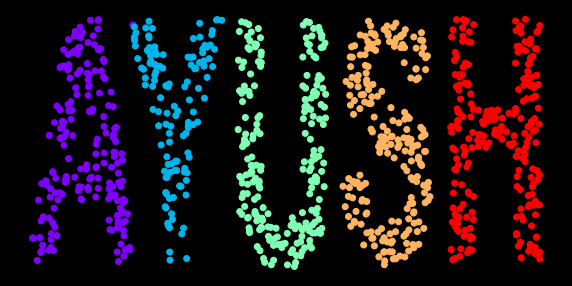

In [28]:
plt.figure(figsize= (10, 5))
plt.style.use('dark_background')
plt.scatter(final[:, 0], final[:, 1], c= final[:,0], cmap= plt.cm.get_cmap('rainbow', 5))
plt.axis('off');

# 

Now, he represents the ROTATION of the data points by using sin and cosin

In [50]:
angle = 20
theta = np.deg2rad(angle)
rotate = [[np.cos(theta), np.sin(theta)],
          [-np.sin(theta), np.cos(theta)]]
rotatED = final@rotate

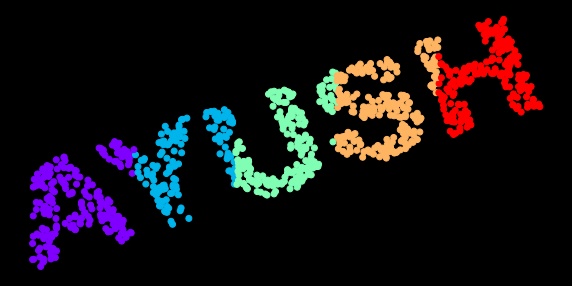

In [51]:
plt.figure(figsize= (10, 5))
plt.style.use('dark_background')
plt.scatter(rotatED[:, 0], rotatED[:, 1], c= rotatED[:,0], cmap= plt.cm.get_cmap('rainbow', 5))
plt.axis('off');

In [52]:
from sklearn.metrics import pairwise_distances

In [75]:
visualize = pairwise_distances(final)
visualize

array([[0.        , 0.00919666, 0.08276711, ..., 3.91186596, 3.91275315,
        3.97515322],
       [0.00919666, 0.        , 0.07800747, ..., 3.90274413, 3.90362478,
        3.96641726],
       [0.08276711, 0.07800747, 0.        , ..., 3.87547746, 3.87593874,
        3.95350165],
       ...,
       [3.91186596, 3.90274413, 3.87547746, ..., 0.        , 0.02235137,
        0.75076647],
       [3.91275315, 3.90362478, 3.87593874, ..., 0.02235137, 0.        ,
        0.77311058],
       [3.97515322, 3.96641726, 3.95350165, ..., 0.75076647, 0.77311058,
        0.        ]])

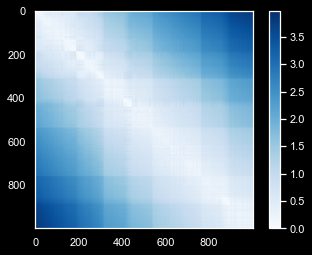

In [78]:
plt.imshow(visualize, cmap= 'Blues')
plt.colorbar();

## 

The `x and y` cordinates are not related for this. The thing which is related is - Distances between the points. 

Now that we have the Pairwise distance, as shown in the image, we can `RECONSTRUCT` the original data from this.

In [79]:
from sklearn.manifold import MDS

This is exaclty, what MDS does, given a distance matrix, it tries to recover the D-dimentional data back from the matrix.

In [80]:
model = MDS(n_components= 2, dissimilarity= 'precomputed')

In [82]:
back = model.fit_transform(visualize)

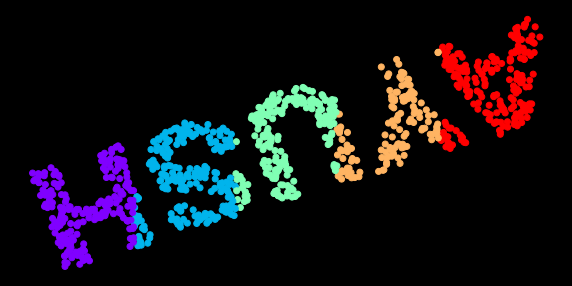

In [83]:
plt.figure(figsize= (10, 5))
plt.scatter(back[:, 0], back[:, 1], c= back[:,0], cmap= plt.cm.get_cmap('rainbow', 5))
plt.axis('off');

What! We have just recovered ↑ from the distance matrix!

    Flipping...

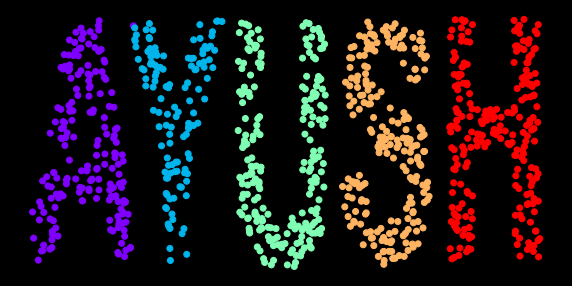

In [96]:
angle = -18
theta = np.deg2rad(angle)
rotate = [[-np.cos(theta),- np.sin(theta)],
          [np.sin(theta), -np.cos(theta)]]
rotatED = back@rotate

plt.figure(figsize= (10, 5))
plt.scatter(rotatED[:, 0], rotatED[:, 1], c= rotatED[:,0], cmap= plt.cm.get_cmap('rainbow', 5))
plt.axis('off');

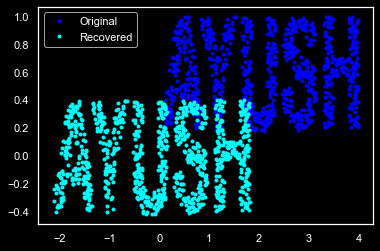

In [110]:
plt.plot(final[:,0], final[:,1], '.', label= 'Original', color= 'blue')
plt.plot(rotatED[:,0], rotatED[:,1], '.', label= 'Recovered', color= 'cyan')
plt.legend();

# Recovered and Flipped to get the original! 

There is more in the book, but I am not actully getting the idea, as I want to learn math and until I get satisfied, I don't find myself as a ssatisfied. So, I am skipping the exercise in it and actually it is not that required topic.

Next up - we will cover the K means algorithamn and code it out.